# Alura Challenge - Semana 01

## Contextualização do problema

A empresa operadora de telecomunicações Alura Voz necessita de um cientista de dados para avaliar e reduzir a Taxa de Evasão de Clientes, conhecido como Churn Rate. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Como passo inicial, é necessária a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.

Fonte dos Dados:

A base de dados e suas informações foram adquiridas através da API da Alura Voz e estão disponíveis em https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json

## Dicionário de dados

• customerID: número de identificação único de cada cliente

• Churn: se o cliente deixou ou não a empresa

• gender: gênero (masculino e feminino)

• SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

• Partner: se o cliente possui ou não um parceiro ou parceira

• Dependents: se o cliente possui ou não dependentes

• tenure: meses de contrato do cliente

• PhoneService: assinatura de serviço telefônico

• MultipleLines: assisnatura de mais de uma linha de telefone

• InternetService: assinatura de um provedor internet

• OnlineSecurity: assinatura adicional de segurança online

• OnlineBackup: assinatura adicional de backup online

• DeviceProtection: assinatura adicional de proteção no dispositivo

• TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

• StreamingTV: assinatura de TV a cabo

• StreamingMovies: assinatura de streaming de filmes

• Contract: tipo de contrato

• PaperlessBilling: se o cliente prefere receber online a fatura

• PaymentMethod: forma de pagamento

• Charges.Monthly: total de todos os serviços do cliente por mês

• Charges.Total: total gasto pelo cliente

## Objetivos deste trabalho

•	Entender quais informações o conjunto de dados possui;

•	Analisar quais os tipos de dados;

•	Verificar quais são as inconsistências nos dados;

•	Corrigir as inconsistências nos dados;

•	Traduzir as colunas;

•	Criar coluna de contas diárias.

## Importando as bibliotecas necessárias

In [2]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

## Lendo o arquivo com os dados do problema

In [3]:
dataset = pd.read_json(path_or_buf= 'Telco-Customer-Churn.json', orient='columns')
dataset.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dataset.shape

(7267, 6)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O arquivo API disponibilizado possui dados em formato JSON. Para uma melhor visualização do dataframe, precisamos normalizar as colunas que contêm dicionários de dados:</p>

## Normalizando as colunas do Dataframe

In [5]:
customer_normal = pd.json_normalize(data=dataset.customer)
customer_normal

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [6]:
phone_normal = pd.json_normalize(data=dataset.phone)
phone_normal

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [7]:
internet_normal = pd.json_normalize(data=dataset.internet)
internet_normal

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [8]:
account_normal = pd.json_normalize(data=dataset.account)
account_normal

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Neste ponto, podemos unir os dataframes individuais e obter o dataframe final.</p>

## Obtendo o dataframe

In [9]:
dataframe = pd.concat([dataset, customer_normal, phone_normal, internet_normal, account_normal], axis = 1)
dataframe = dataframe.drop(columns = {'customer', 'phone', 'internet', 'account'})
dataframe.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
dataframe.shape

(7267, 21)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Para uma melhor compreensão dos dados contidos no nosso dataframe, vamos traduzir as colunas para português com o auxílio do dicionário fornecido anteriormente:</p>

## Traduzindo as colunas do dataframe

In [11]:
colunas = {'customerID': 'ID_Cliente', 'gender': 'Genero', 'SeniorCitizen': 'Idoso', 'Partner': 'Parceiro',
         'Dependents': 'Dependentes', 'tenure': 'Meses_Contrato', 'PhoneService': 'Servico_Telefonico', 
         'MultipleLines': 'Multiplas_Linhas', 'InternetService': 'Internet', 'OnlineSecurity': 'Seguranca_Online',
         'OnlineBackup': 'Backup_online', 'DeviceProtection': 'Protecao_Dispositivo', 'TechSupport': 'Suporte_Tecnico',
         'StreamingTV': 'Streaming_TV', 'StreamingMovies': 'Streaming_Filmes', 'Contract': 'Contrato',
         'PaperlessBilling': 'Fatura_Online', 'PaymentMethod': 'Forma_Pagamento', 'Charges.Monthly': 'Gasto_Mensal',
         'Charges.Total': 'Gasto_Total'}

dataframe = dataframe.rename(columns = colunas)
dataframe.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Portanto, podemos compreender dos dados fornecidos que nosso dataset contém informações pessoais, comerciais e financeiras à respeito de cada cliente da empresa Alura Voz. Estas informações serão importantes para mapear e classificar os clientes como potenciais candidatos ao Churn ou não. A seguir, podemos visualizar quais os tipos de dados contidos no dataset e identificar eventuais inconsistências.</p>

## Identificando os tipos de dados e inconsistências

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Internet              7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

In [13]:
dataframe.duplicated().sum()

0

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Não foram identificados valores nulos ou duplicados nas colunas do dataframe. Uma primeira inconsistência identificada, porém, se refere ao tipo de dado da coluna 'Gasto_Total', a qual deverá ser tratada posteriormente. Vamos agora obter uma tabela com os valores únicos de cada coluna não numérica. </p>

In [14]:
labels_2 = {'Genero': dataframe.Genero.unique(), 'Idoso': dataframe.Idoso.unique(), 
            'Parceiro': dataframe.Parceiro.unique(), 'Dependentes': dataframe.Dependentes.unique(),
            'Servico_Telefonico': dataframe.Servico_Telefonico.unique(), 'Fatura_Online': dataframe.Fatura_Online.unique()}
labels_3 = {'Churn': dataframe.Churn.unique(), 'Multiplas_Linhas': dataframe.Multiplas_Linhas.unique(), 
            'Internet': dataframe.Internet.unique(), 'Seguranca_Online': dataframe.Seguranca_Online.unique(), 
            'Backup_online': dataframe.Backup_online.unique(), 'Protecao_Dispositivo': dataframe.Protecao_Dispositivo.unique(), 
            'Suporte_Tecnico': dataframe.Suporte_Tecnico.unique(), 'Streaming_TV': dataframe.Streaming_TV.unique(),
            'Streaming_Filmes': dataframe.Streaming_Filmes.unique(), 'Contrato': dataframe.Contrato.unique()}
labels_4 = {'Forma_Pagamento': dataframe.Forma_Pagamento.unique()}
unicos_2 = pd.DataFrame(labels_2)
unicos_3 = pd.DataFrame(labels_3)
unicos_4 = pd.DataFrame(labels_4)
unicos_2_3 = unicos_2.merge(unicos_3, how = 'outer', left_index=True, right_index=True)
valores_unicos = unicos_2_3.merge(unicos_4, how = 'outer', left_index=True, right_index=True)
valores_unicos = valores_unicos.fillna('-')
valores_unicos

,Genero,Idoso,Parceiro,Dependentes,Servico_Telefonico,Fatura_Online,Churn,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Forma_Pagamento
0,Female,0.0,Yes,Yes,Yes,Yes,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check
1,Male,1.0,No,No,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Electronic check
2,-,-,-,-,-,-,,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic)
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Bank transfer (automatic)


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Percebe-se uma inconsistência no formato dos dados: strings e inteiros para representar dados binários semelhantes. Ou seja, devemos deixar nosso dataset na mesma base de comparação para posterior utilização de modelos preditivos. Além disto, encontramos dados indicando 'sem serviço de telefone' e 'sem serviço de internet'. Estes dados, para efeito prático de modelagem, poderiam ser agrupados nos valores 'nao', dentro da sua respectiva coluna.
Uma outra inconsistência é observada na coluna 'Churn': existem valores vazios, que também devem ser tratados. Vamos analisar a quantidade relativa destes valores nesta coluna:</p>

In [15]:
round(dataframe.Churn.value_counts(normalize = True)*100, 2)

No     71.20
Yes    25.72
        3.08
Name: Churn, dtype: float64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Uma vez que a quantidade de valores vazios é proporcionalmente pequena, e estes valores inviabilizarão a modalegem preditiva posterior, vamos tomar a decisão de eliminá-los do nosso dataframe.</p>

## Corrigindo inconsistências

### Convertendo coluna 'Gasto_Total' para tipo float

In [16]:
dataframe_final = dataframe.copy()

In [17]:
dataframe_final['Gasto_Total'] = pd.to_numeric(dataframe_final['Gasto_Total'], errors = 'coerce')
dataframe_final.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [18]:
dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Internet              7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Percebemos que, ao corrigir a inconsistência do tipo de dado da coluna 'Gasto_Total', foi gerada uma nova inconsistência relativa à presença de 11 valores nulos nesta coluna (0,15% do total). Vamos analisar estes dados:</p>

In [19]:
dataframe.loc[dataframe_final['Gasto_Total'].isnull()]


,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A tabela anterior indica que os valores nulos da coluna 'Gasto_Total' se referem a clientes que estão, provavelmente, no primeiro mês de assinatura dos serviços da Alura Voz. Já que estes clientes possuem gastos mensais já faturados, iremos substituir os valores nulos pelos respectivos valores da coluna 'Gasto_Mensal'</p>

### Substituindo os valores nulos da coluna 'Gasto_Total' pelos valores da coluna 'Gasto_Mensal'

In [20]:
dataframe_final.Gasto_Total.isnull().sum()

11

In [21]:
dataframe_final.Gasto_Total.fillna(dataframe_final.Gasto_Mensal, inplace = True)

In [22]:
dataframe_final.iloc[[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]]

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85


In [23]:
dataframe_final.Gasto_Total.isnull().sum()

0

In [24]:
dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Internet              7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

### Eliminando valores vazios da coluna 'Churn'

In [25]:
dataframe_final.drop(dataframe_final.loc[dataframe_final['Churn'] == ''].index, inplace = True)

In [26]:
dataframe_final.shape

(7043, 21)

In [27]:
dataframe_final.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Convertendo valores das colunas

In [28]:
converte_parceiro = {'Yes' : 1, 'No': 0}
converte_dependentes = {'Yes' : 1, 'No': 0}
converte_servico_telefonico = {'Yes' : 1, 'No': 0}
converte_fatura_online = {'Yes' : 1, 'No': 0}
converte_churn = {'Yes' : 1, 'No': 0}
converte_multiplas_linhas = {'Yes' : 1, 'No': 0, 'No phone service': 0}
converte_seguranca_online = {'Yes' : 1, 'No': 0, 'No internet service': 0}
converte_backup_online = {'Yes' : 1, 'No': 0, 'No internet service': 0}
converte_protecao_dispositivo = {'Yes' : 1, 'No': 0, 'No internet service': 0}
converte_suporte_tecnico = {'Yes' : 1, 'No': 0, 'No internet service': 0}
converte_streaming_tV = {'Yes' : 1, 'No': 0, 'No internet service': 0}
converte_streaming_filmes = {'Yes' : 1, 'No': 0, 'No internet service': 0}

dataframe_final['Parceiro'] = dataframe_final['Parceiro'].map(converte_parceiro)
dataframe_final['Dependentes'] = dataframe_final['Dependentes'].map(converte_dependentes)
dataframe_final['Servico_Telefonico'] = dataframe_final['Servico_Telefonico'].map(converte_servico_telefonico)
dataframe_final['Fatura_Online'] = dataframe_final['Fatura_Online'].map(converte_fatura_online)
dataframe_final['Churn'] = dataframe_final['Churn'].map(converte_churn)
dataframe_final['Multiplas_Linhas'] = dataframe_final['Multiplas_Linhas'].map(converte_multiplas_linhas)
dataframe_final['Seguranca_Online'] = dataframe_final['Seguranca_Online'].map(converte_seguranca_online)
dataframe_final['Backup_online'] = dataframe_final['Backup_online'].map(converte_backup_online)
dataframe_final['Protecao_Dispositivo'] = dataframe_final['Protecao_Dispositivo'].map(converte_protecao_dispositivo)
dataframe_final['Suporte_Tecnico'] = dataframe_final['Suporte_Tecnico'].map(converte_suporte_tecnico)
dataframe_final['Streaming_TV'] = dataframe_final['Streaming_TV'].map(converte_streaming_tV)
dataframe_final['Streaming_Filmes'] = dataframe_final['Streaming_Filmes'].map(converte_streaming_filmes)

dataframe_final.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Após termos tratado as inconsistências no nosso dataset, iremos analisar mais detalhadamente os dados presentes:</p>

## Análise dados do dataframe

### Dados pessoais e comerciais - proporção e agrupamento

In [29]:
round(dataframe.Genero.value_counts(normalize = True)*100, 2)

Male      50.57
Female    49.43
Name: Genero, dtype: float64

In [30]:
round(dataframe.Idoso.value_counts(normalize = True)*100, 2)

0    83.73
1    16.27
Name: Idoso, dtype: float64

In [31]:
round(dataframe.Parceiro.value_counts(normalize = True)*100, 2)

No     51.59
Yes    48.41
Name: Parceiro, dtype: float64

In [32]:
round(dataframe.Dependentes.value_counts(normalize = True)*100, 2)

No     69.99
Yes    30.01
Name: Dependentes, dtype: float64

In [33]:
round(dataframe.Servico_Telefonico.value_counts(normalize = True)*100, 2)

Yes    90.27
No      9.73
Name: Servico_Telefonico, dtype: float64

In [34]:
round(dataframe.Multiplas_Linhas.value_counts(normalize = True)*100, 2)

No                  48.09
Yes                 42.18
No phone service     9.73
Name: Multiplas_Linhas, dtype: float64

In [35]:
round(dataframe.Internet.value_counts(normalize = True)*100, 2)

Fiber optic    44.01
DSL            34.24
No             21.76
Name: Internet, dtype: float64

In [36]:
round(dataframe.Seguranca_Online.value_counts(normalize = True)*100, 2)

No                     49.65
Yes                    28.60
No internet service    21.76
Name: Seguranca_Online, dtype: float64

In [37]:
round(dataframe.Backup_online.value_counts(normalize = True)*100, 2)

No                     43.79
Yes                    34.46
No internet service    21.76
Name: Backup_online, dtype: float64

In [38]:
round(dataframe.Protecao_Dispositivo.value_counts(normalize = True)*100, 2)

No                     43.97
Yes                    34.28
No internet service    21.76
Name: Protecao_Dispositivo, dtype: float64

In [39]:
round(dataframe.Suporte_Tecnico.value_counts(normalize = True)*100, 2)

No                     49.29
Yes                    28.95
No internet service    21.76
Name: Suporte_Tecnico, dtype: float64

In [40]:
round(dataframe.Streaming_TV.value_counts(normalize = True)*100, 2)

No                     39.85
Yes                    38.39
No internet service    21.76
Name: Streaming_TV, dtype: float64

In [41]:
round(dataframe.Streaming_Filmes.value_counts(normalize = True)*100, 2)

No                     39.49
Yes                    38.75
No internet service    21.76
Name: Streaming_Filmes, dtype: float64

In [42]:
round(dataframe.Contrato.value_counts(normalize = True)*100, 2)

Month-to-month    55.11
Two year          23.99
One year          20.90
Name: Contrato, dtype: float64

In [43]:
round(dataframe.Fatura_Online.value_counts(normalize = True)*100, 2)

Yes    59.32
No     40.68
Name: Fatura_Online, dtype: float64

In [44]:
round(dataframe.Forma_Pagamento.value_counts(normalize = True)*100, 2)

Electronic check             33.65
Mailed check                 22.91
Bank transfer (automatic)    21.87
Credit card (automatic)      21.58
Name: Forma_Pagamento, dtype: float64

In [45]:
agrupamento_internet = dataframe_final[['Gasto_Total', 'Internet']].groupby(by = 'Internet').agg(func=['min', 
                                                                                                    'median', 'max', 'count'])
agrupamento_internet

Gasto_Total                        
                    min   median      max count
Internet                                       
DSL               23.45  1596.60  6859.05  2421
Fiber optic       68.50  2660.65  8684.80  3096
No                18.80   519.20  2006.95  1526

In [46]:
agrupamento_pagamento = dataframe_final[['Gasto_Total', 'Forma_Pagamento']].groupby(by = 'Forma_Pagamento').agg(func=['min',
                                                                                                    'median', 'max', 'count'])
agrupamento_pagamento

Gasto_Total                         
                                  min    median      max count
Forma_Pagamento                                               
Bank transfer (automatic)       19.25  2472.775  8684.80  1544
Credit card (automatic)         19.30  2445.950  8670.10  1522
Electronic check                18.85  1253.900  8564.75  2365
Mailed check                    18.80   465.250  8331.95  1612

In [47]:
agrupamento_contrato = dataframe_final[['Gasto_Total', 'Contrato']].groupby(by = 'Contrato').agg(func=['min', 
                                                                                                    'median', 'max', 'count'])
agrupamento_contrato

Gasto_Total                        
                       min   median      max count
Contrato                                          
Month-to-month       18.85   679.55  8061.50  3875
One year             18.80  2656.70  8684.80  1473
Two year             19.85  3593.80  8672.45  1695

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Optou-se por utilizar o dataframe original (pré tratamento dos valores) de modo a se ter uma visão mais ampla de cada feature. A partir da análise anterior, algumas informações relevantes podem ser obtidas e que, posteriormente, poderão ser validadas na modelagem preditiva do Churn: Aproximadamente 22% dos clientes não assina o serviço de internet da Alura Voz. Campanhas comerciais de conversão dos clientes para este serviço podem ser interessantes; 34% da base de clientes utiliza serviço de internet DSL. A depender da disponiblilidade da rede de Fibra Ótica, também é interessante incentivar a alteração para este serviço, visto o ARPU (receita média por usuário) ser superior, como foi possível verificar anteriormente; De forma semelhante, é grande o número de clientes que assina internet e não utiliza os serviços extras relacionados; Por fim, é possível observar que uma parte relevante da base de clientes possui contratos de curto-prazo e pagam os serviços através de boleto (email e físico). Neste sentido, é importante haver estratégias de incentivo destes clientes para migração por meios de relacionamento que priviligiem a manutenção dos mesmos na base e que produzam uma receita de longo prazo superior, conforme observado.</p>

### Tempo de contrato do cliente

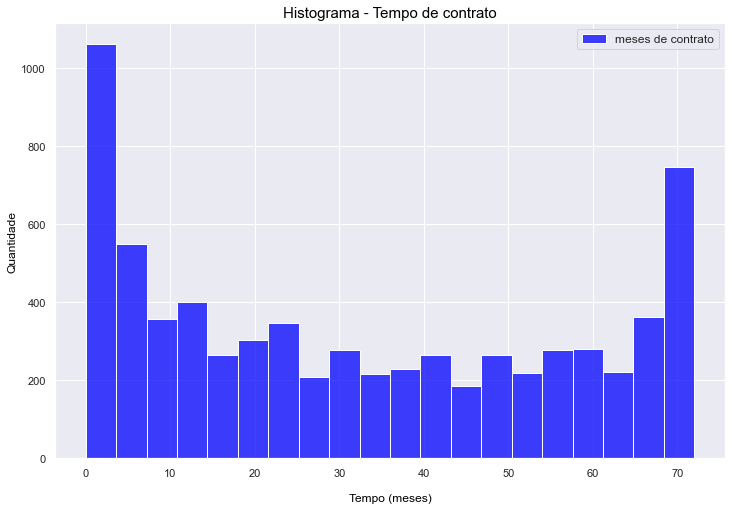

In [48]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,8))

plt.xlabel('Tempo (meses)', color = 'black', fontsize = 12, labelpad = 15)

ax = sns.histplot(x = dataframe_final['Meses_Contrato'], color = 'Blue', kde = False, bins = 20, label = 'meses de contrato')
ax.set_title('Histograma - Tempo de contrato', fontsize = 15, color = 'black')
ax.set_ylabel('Quantidade', color = 'black', fontsize = 12)
ax.legend(fontsize = 12)

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>É possível observar que uma grande quantidade de clientes possui um tempo curto de contrato, inferior a 1 ano. Observa-se, também, que existe uma relevante fatia dos clientes que possuem serviço com a Alura Voz há pelo menos 70 meses. É interessante, neste sentido, avaliar estratégias para fidelizar os clientes, de modo que os mesmos superem o primeiro ano de contrato e migrem para períodos de permanência superiores.</p>

### Gasto por cliente 

In [49]:
dataframe_final.Gasto_Mensal.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Gasto_Mensal, dtype: float64

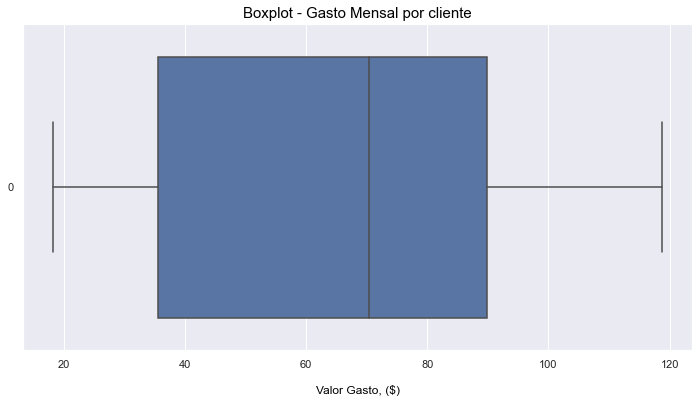

In [50]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,6))

plt.xlabel('Valor Gasto, ($)', color = 'black', fontsize = 12, labelpad = 15)

ax = sns.boxplot(data = dataframe_final['Gasto_Mensal'], orient = 'h')
ax.set_title('Boxplot - Gasto Mensal por cliente', fontsize = 15, color = 'black')

plt.show()

In [51]:
dataframe_final.Gasto_Total.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Gasto_Total, dtype: float64

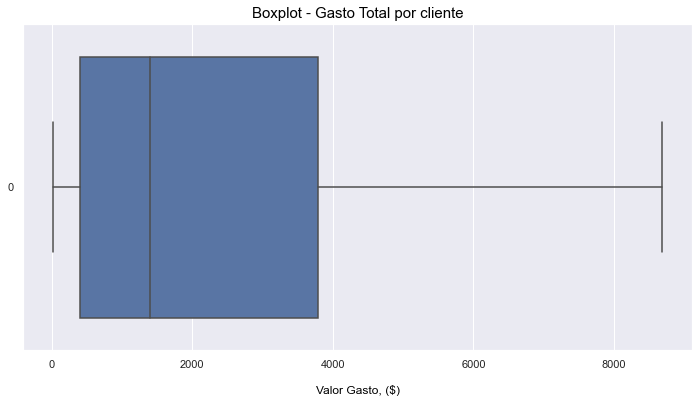

In [52]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,6))

plt.xlabel('Valor Gasto, ($)', color = 'black', fontsize = 12, labelpad = 15)

ax = sns.boxplot(data = dataframe_final['Gasto_Total'], orient = 'h')
ax.set_title('Boxplot - Gasto Total por cliente', fontsize = 15, color = 'black')

plt.show()

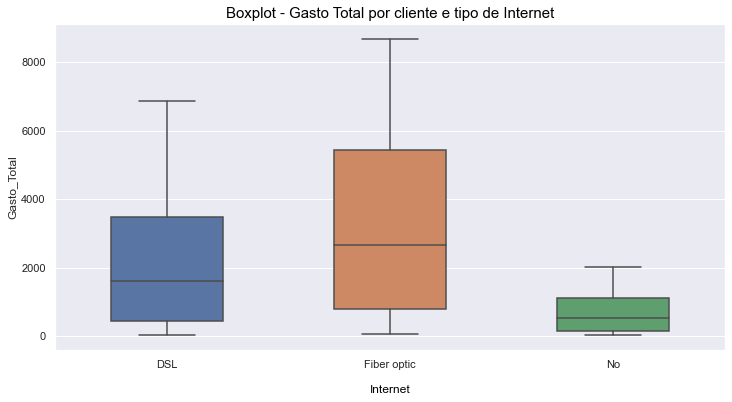

In [53]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,6))

plt.xlabel('Valor Gasto, ($)', color = 'black', fontsize = 12, labelpad = 15)

ax = sns.boxplot(data = dataframe_final, x = 'Internet', y = 'Gasto_Total', orient = 'v', width = 0.5)
ax.set_title('Boxplot - Gasto Total por cliente e tipo de Internet', fontsize = 15, color = 'black')

plt.show()

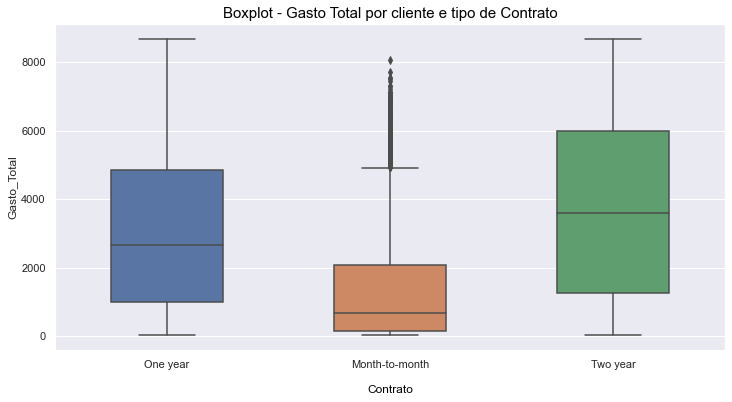

In [54]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,6))

plt.xlabel('Valor Gasto, ($)', color = 'black', fontsize = 12, labelpad = 15)

ax = sns.boxplot(data = dataframe_final, x = 'Contrato', y = 'Gasto_Total', orient = 'v', width = 0.5)
ax.set_title('Boxplot - Gasto Total por cliente e tipo de Contrato', fontsize = 15, color = 'black')

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O gasto médio mensal por cliente se aproxima do gasto mediano. Quando tomamos como base o gasto total por cliente, temos um alongamento em direção ao terceiro quartil, indicando que uma parcela menor de usuários é responsável por um faturamento maior. Analisando o gráfico de boxplot tendo a variável 'Internet' como parâmetro extra, é respaldada a conclusão anterior de que o faturamento é maior para o serviço de fibra óptica. Conclusão semelhante em favor do contrato de maior prazo pode ser obtida através do gráfico boxplot que leva em consideração o tipo de contrato. Para este último caso, é interessante observar, ainda, a presença de muitos 'outliers', indicando que pode ser interessante o esforço de migração da base de clientes para contratos de maior prazo.</p>

## Criando coluna de gastos diários

In [55]:
dataframe_final.insert(loc = 19, value = round((dataframe_final['Gasto_Mensal'] / 30), 2), 
                                         column = 'Gasto_diario')
dataframe_final.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_diario,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,2.80,83.9,267.40


In [56]:
dataframe_final.shape

(7043, 22)

# Alura Challenge - Semana 02

## Objetivos deste trabalho

•	Analisar a variável target: Churn;

•	Visualizar a distribuição da variável target: Churn;

•	Criar visualizações relevantes em relação ao Churn;

•	Analisar a correlação das variáveis;

•	Testar diferentes tipos de gráficos.

## Analisando e Visualizando a variável target: Churn

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A empresa Alura Voz deseja reduzir a taxa de evasão de clientes, traduzida pela variável target 'Churn'. Antes de compreendermos melhor a relação entre essa variável  e as demais features presentes no nosso dataframe, vamos avaliar a atual taxa de Churn para a nossa base de clientes:</p>

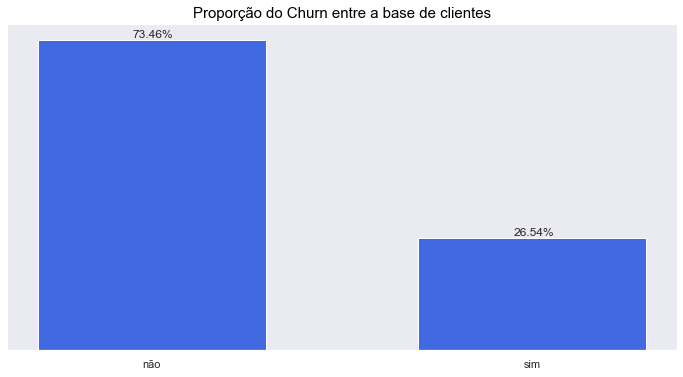

In [57]:
proporcao_churn = round(dataframe_final.Churn.value_counts(normalize = True)*100, 2)
labels = ['não', 'sim']
plt.figure(figsize = (12, 6))
plt.title('Proporção do Churn entre a base de clientes', fontsize = 15, color = 'black')
plt.bar(labels, proporcao_churn, width = 0.6, color = "royalblue")
plt.grid(False)
for i, v in enumerate(proporcao_churn):
    plt.text(i - 0.05, v + 0.5, str(v) + '%')
plt.yticks([])
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Percebemos, portanto, que a taxa de Churn atual é cerca de 27%, bem acima da média das principais empresas nacionais de telecomunicação (3%). Desta forma, é imprescíndivel que consigamos identificar quais features do dataframe possuem relação explicativa da variável target, a fim de que nosso modelo preditivo tenha a melhor acurácia possível. Assim, iniciaremos por calcular a correlação existente entre todas as features do dataframe.</p>

## Analisando a correlação das variáveis

In [58]:
df_churn = dataframe_final.copy()

converte_genero = {'Male' : 1, 'Female': 0}
converte_internet = {'DSL' : 1, 'Fiber optic': 1, 'No': 0}

df_churn['Genero'] = df_churn['Genero'].map(converte_genero)
df_churn['Internet'] = df_churn['Internet'].map(converte_internet)

df_churn.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Gasto_diario,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,One year,1,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,Month-to-month,0,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,0,0,1,0,0,0,Month-to-month,1,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,0,1,1,0,1,1,Month-to-month,1,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,0,0,0,1,1,0,Month-to-month,1,Mailed check,2.80,83.9,267.40


In [59]:
df_churn = pd.get_dummies(df_churn, columns = ['Contrato', 'Forma_Pagamento'], dtype= 'int64')
df_churn = df_churn.rename(columns = {'Contrato_Month-to-month': 'Mensal', 'Contrato_One year': '1_ano', 
'Contrato_Two year': '2_anos', 'Forma_Pagamento_Mailed check': 'Boleto_correios', 
'Forma_Pagamento_Electronic check': 'Boleto_eletronico', 'Forma_Pagamento_Bank transfer (automatic)': 'Transf_banco', 
'Forma_Pagamento_Credit card (automatic)': 'Cartao_credito'})

df_churn.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Internet,Seguranca_Online,Backup_online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Online,Gasto_diario,Gasto_Mensal,Gasto_Total,Mensal,1_ano,2_anos,Transf_banco,Cartao_credito,Boleto_eletronico,Boleto_correios
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,2.19,65.6,593.30,0,1,0,0,0,0,1
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,2.00,59.9,542.40,1,0,0,0,0,0,1
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,0,0,1,0,0,0,1,2.46,73.9,280.85,1,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,0,1,1,0,1,1,1,3.27,98.0,1237.85,1,0,0,0,0,1,0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,0,0,0,1,1,0,1,2.80,83.9,267.40,1,0,0,0,0,0,1


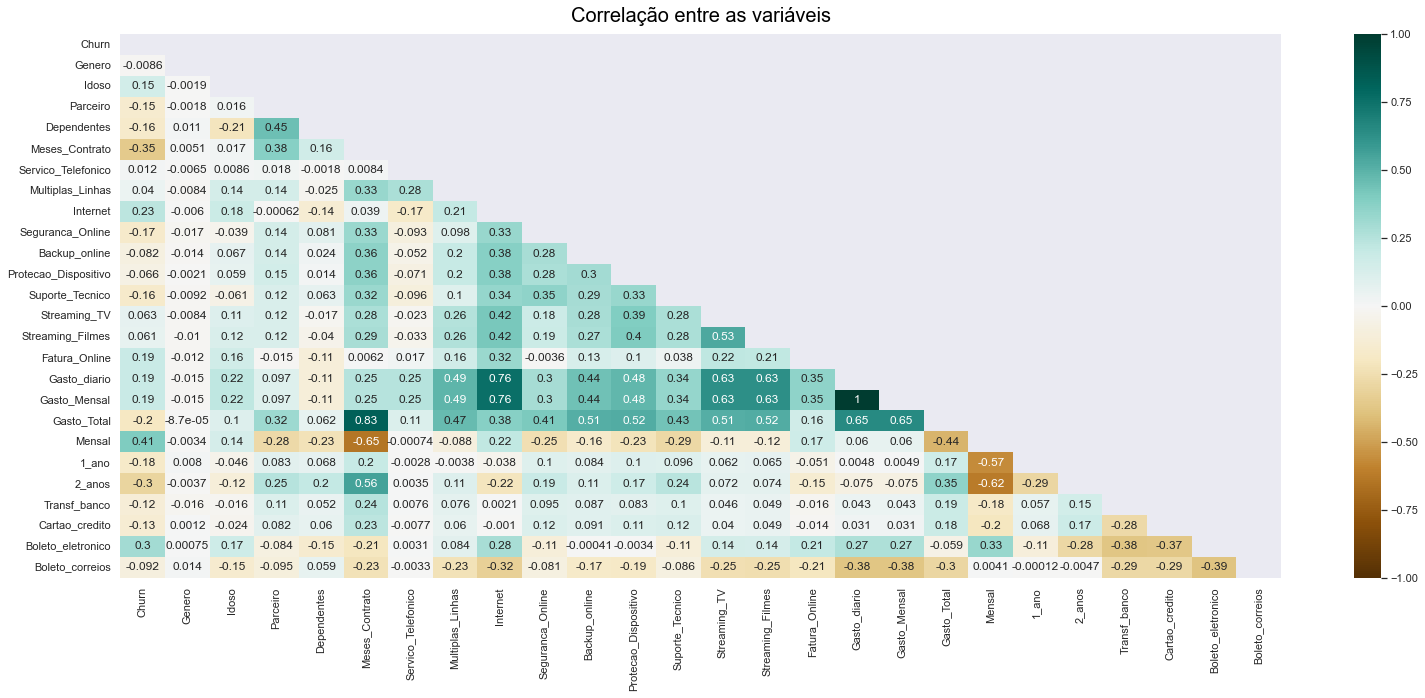

In [60]:
plt.figure(figsize=(26, 10))
mask = np.triu(np.ones_like(df_churn.corr(), dtype=bool))
ax = sns.heatmap(df_churn.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = mask)
ax.set_title('Correlação entre as variáveis', fontdict={'fontsize':20}, pad=12, color = 'black')
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A primeira coluna da tabela acima nos permite observar a correlação entre a variável target 'Churn' e as demais features. Como variáveis de correlação positiva relevante com a variável target, temos 'Idoso' (cliente com idade igual ou superior a 65 anos), 'Internet', 'Fatura_Online', 'Gasto_Mensal', 'Mensal' (referente ao tipo de contrato) e 'Boleto_eletronico' (referente ao tipo de pagamento). As variáveis com correlação negativa relevante são 'Dependentes', 'Meses_Contrato', 'Gasto_Total', '2_anos' (referente ao tipo de contrato) e 'Cartao_credito' (referente ao tipo de pagamento). As demais features parecem ter relações fortes entre si e entre as features já descritas, o que poderia causar alguns problemas no modelo de predição. Por ora, iremos focar nas features selecionadas e, na sequência, analisar graficamente a relação de algumas delas com a nossa variável de interesse.</p>

## Criando visualizações relevantes em relação ao Churn

### Relação Meses de Contrato x Churn

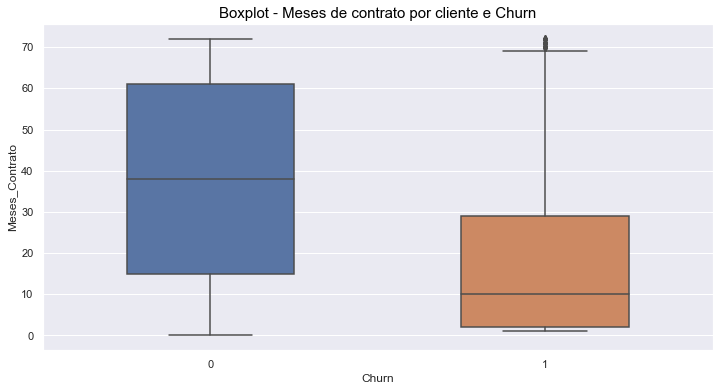

In [61]:
sns.set(style = 'darkgrid')

plt.figure(figsize=(12,6))

ax = sns.boxplot(data = df_churn, x = 'Churn', y = 'Meses_Contrato', orient = 'v', width = 0.5)
ax.set_title('Boxplot - Meses de contrato por cliente e Churn', fontsize = 15, color = 'black')

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>É possível observar que, para aqueles clientes que saem da empresa, a mediana do tempo total de contrato (meses) é inferior àquela dos clientes que permanecem. Este gráfico indica que a retenção dos clientes por um tempo superior pode levar à redução da taxa de Churn.</p>

### Relação Gasto Total e Mensal x Churn

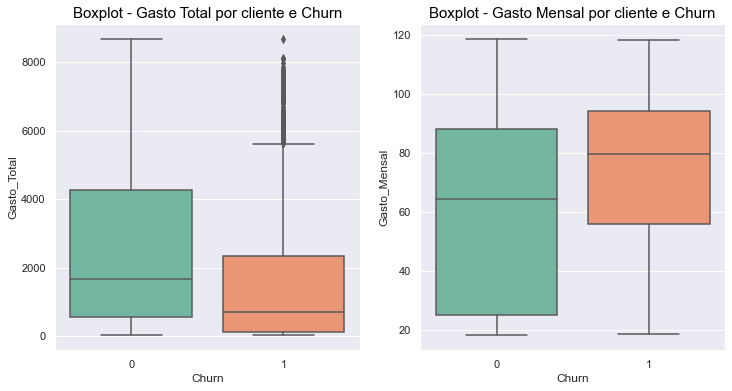

In [62]:
f, axes = plt.subplots(1,2,figsize = (12,6))

ax.set_title('Boxplot - Gasto Mensal por cliente e Churn', fontsize = 15, color = 'black')

sns.boxplot(data = df_churn, x = 'Churn', y = 'Gasto_Total', orient = 'v', ax = axes[0], palette="Set2")
axes[0].set_title('Boxplot - Gasto Total por cliente e Churn', fontsize = 15, color = 'black')

sns.boxplot(data = df_churn, x = 'Churn', y = 'Gasto_Mensal', orient = 'v', ax = axes[1], palette="Set2")
axes[1].set_title('Boxplot - Gasto Mensal por cliente e Churn', fontsize = 15, color = 'black')

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os gráficos possuem comportamento inverso: enquanto os clientes com maior gasto total tendem a permanecer na Alura Voz, os maiores gastos mensais estão associados a clientes que deixaram a empresa. </p>

### Relações Internet x Churn, Idoso x Churn, Dependentes x Churn e Fatura Online x Churn

In [63]:
internet_1 =  df_churn[df_churn['Internet'] == 1]
com_internet = internet_1.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'com_internet')
internet_0 =  df_churn[df_churn['Internet'] == 0]
sem_internet = internet_0.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'sem_internet')

churn_internet = pd.concat([com_internet, sem_internet], axis = 1)
churn_internet.index.name = 'Churn'
churn_internet.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_internet

,com_internet,sem_internet
Churn,,
não,68.17%,92.60%
sim,31.83%,7.40%


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A tendência demonstrada aqui é de que a taxa de churn é menor dentre os clientes que não possuem serviço de Internet.</p>

In [64]:
idoso_1 =  df_churn[df_churn['Idoso'] == 1]
maior_65 = idoso_1.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'maior_65_anos')
idoso_0 =  df_churn[df_churn['Idoso'] == 0]
menor_65 = idoso_0.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'menor_65_anos')

churn_idoso = pd.concat([maior_65, menor_65], axis = 1)
churn_idoso.index.name = 'Churn'
churn_idoso.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_idoso

,maior_65_anos,menor_65_anos
Churn,,
não,58.32%,76.39%
sim,41.68%,23.61%


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A taxa de churn se apresenta mais elevada nos clientes com idade igual ou superior a 65 anos.</p>

In [65]:
dependentes_1 =  df_churn[df_churn['Dependentes'] == 1]
com_dependentes = dependentes_1.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'com_dependentes')
dependentes_0 =  df_churn[df_churn['Dependentes'] == 0]
sem_dependentes = dependentes_0.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'sem_dependentes')

churn_dependentes = pd.concat([com_dependentes, sem_dependentes], axis = 1)
churn_dependentes.index.name = 'Churn'
churn_dependentes.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_dependentes

,com_dependentes,sem_dependentes
Churn,,
não,84.55%,68.72%
sim,15.45%,31.28%


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Há uma redução da taxa de churn na base de clientes que possuem dependentes.</p>

In [66]:
fatura_1 =  df_churn[df_churn['Fatura_Online'] == 1]
com_fatura_online = fatura_1.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'com_fatura_online')
fatura_0 =  df_churn[df_churn['Fatura_Online'] == 0]
sem_fatura_online = fatura_0.Churn.value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(100*x)).to_frame(name = 'sem_fatura_online')

churn_fatura = pd.concat([com_fatura_online, sem_fatura_online], axis = 1)
churn_fatura.index.name = 'Churn'
churn_fatura.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_fatura

,com_fatura_online,sem_fatura_online
Churn,,
não,66.43%,83.67%
sim,33.57%,16.33%


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Outra relação observada é o aumento da taxa de churn para os clientes que têm preferência pelo recebimento da fatura via online.</p>

## Criando visualizações com o Plotly

### Relação Meses de Contrato x Gênero x Churn

In [67]:
fig = px.histogram(dataframe_final, x='Genero', y = 'Meses_Contrato',
             color='Churn', barmode='group',
             histfunc='avg',
             height=400, title ='Média de meses de contrato por Gênero e Churn')

iplot(fig)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Interessante observar que, conforme indicava o gráfico de correlação entre variáveis, a feature 'Genero' não parece ter relevância na taxa de Churn entre clientes.</p>

### Relação Tipo de Contrato x Churn

In [68]:
one_year =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[0]]
anual = round(one_year.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'anual')
month_to_month =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[1]]
mensal = round(month_to_month.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'mensal')
two_years =  dataframe_final[dataframe_final['Contrato'] == dataframe_final['Contrato'].unique()[2]]
bianual = round(two_years.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'bianual')

churn_contrato = pd.concat([mensal, anual, bianual], axis = 1)
churn_contrato.index.name = 'Churn'
churn_contrato.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_contrato.reset_index(inplace = True)

fig = px.bar(churn_contrato, x='Churn', y=["mensal", "anual", "bianual"], title="Churn de clientes (%) por Tipo de Contrato")

iplot(fig)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A conclusão mais importante do gráfico acima é de que há uma relevante diminuição da taxa de Churn entre a base de clientes conforme se aumenta o período de contrato de serviços, em linha com o que havíamos anteriormente observado com relação aos gastos individuais.</p>

### Relação Tipo de Pagamento x Churn

In [69]:
mailed_check =  dataframe_final[dataframe_final['Forma_Pagamento'] == dataframe_final['Forma_Pagamento'].unique()[0]]
boleto_correios = round(mailed_check.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'boleto_correios')
eletronic_check =  dataframe_final[dataframe_final['Forma_Pagamento'] == dataframe_final['Forma_Pagamento'].unique()[1]]
boleto_eletronico = round(eletronic_check.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'boleto_eletronico')
credit_card =  dataframe_final[dataframe_final['Forma_Pagamento'] == dataframe_final['Forma_Pagamento'].unique()[2]]
cartao_credito = round(credit_card.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'cartao_credito')
bank_transfer =  dataframe_final[dataframe_final['Forma_Pagamento'] == dataframe_final['Forma_Pagamento'].unique()[3]]
transf_banco = round(bank_transfer.Churn.value_counts(normalize = True)*100,2).to_frame(name = 'transf_banco')

churn_pagamento = pd.concat([boleto_correios, boleto_eletronico, cartao_credito, transf_banco], axis = 1)
churn_pagamento.index.name = 'Churn'
churn_pagamento.rename(index = {0: 'não', 1: 'sim'}, inplace = True)
churn_pagamento = churn_pagamento.T

fig = make_subplots(rows=1, cols=2, specs = [[{'type': 'domain'}, {'type': 'domain'}]], 
                    subplot_titles=('Churn = Não', 'Churn = Sim'))

labels = churn_pagamento.index

fig.add_trace(go.Pie(labels=labels, values=churn_pagamento['não'], textinfo='label+value', textposition='inside'), 
                                                                                                    row =1, col=1)

fig.add_trace(go.Pie(labels=labels, values=churn_pagamento['sim'], textinfo='label+value', textposition='inside'), 
                                                                                                    row =1, col=2)
              
fig.update_layout(height=700, showlegend=False, title_text = 'Churn de clientes (%) por Tipo de Pagamento')
              
iplot(fig)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nesta última relação analisada, é possível inferir que há uma propensão menor de evasão da empresa dentre os clientes que optam pelo pagamento através de Cartão de Crédito, Boleto por correio ou Transferência Bancária, em detrimento aos que preferem Boleto Eletrônico.</p>